### K Nearest Neighbours:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline # importing esssential libraries for data analysis and visualization

UsageError: unrecognized arguments: # importing esssential libraries for data analysis and visualization


In [7]:
df = pd.read_csv('classified_data.csv', index_col = 0) # creating our DataFrame off of classified csv file

In [8]:
df.head() # checking the head of our DataFrame

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [9]:
# As you can see, our data is in classified form i.e we don't know what these columns and values mean
# which most of the companies do, in order to keep their stuff secret

# So before applying our KNN classifier we need to first standarize our DataFrame
# for this I'm gonna do the following

from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler() # creating instance of StandardScaler() method

In [11]:
scaler.fit(df.drop('TARGET CLASS', axis = 1)) # we want to standarize every column except this target one, which we'll predict later

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1)) # applied transformation on our DataFrame to get scaled_features

In [19]:
scaled_features.shape

(1000, 10)

In [22]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
# creating DataFrame off of transformed features, taking all columns excpet last one i.e --> TARGET CLASS

In [21]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [23]:
from sklearn.model_selection import train_test_split # using train_

In [53]:
X = scaled_features
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101) # spliting our data into training and testing sets in order to train our algorithm

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier() # instantiating KNeighboutsClassifier

In [35]:
knn.fit(X_train, y_train) # fitting on our data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
predictions = knn.predict(X_test) # calling predictions off of our algorithm

In [37]:
predictions # predictions made by our classifier algorithm

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions)) # printing classification report and confusion report in order to have an estimate of accuracy

# looks like our algorithm is performaing well will only n_neightbours = 1 

[[154   5]
 [ 12 129]]


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.96      0.91      0.94       141

   micro avg       0.94      0.94      0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [41]:
# Now lets go ahead and pick up value of no of neighbours on which our algorithm will have a better accuracy

# for that I'm gonna create a plot that shows the mean error rate VS value of 'K'

error_list = []

for i in range(1,40): # taking values of n_neighbours from 1-40 and computing our error rate for every single value
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    predict_i = knn.predict(X_test)
    error_list.append(np.mean(predict_i != y_test))

In [55]:
# y_test

In [56]:
# error_list

Text(0, 0.5, 'Error Rate')

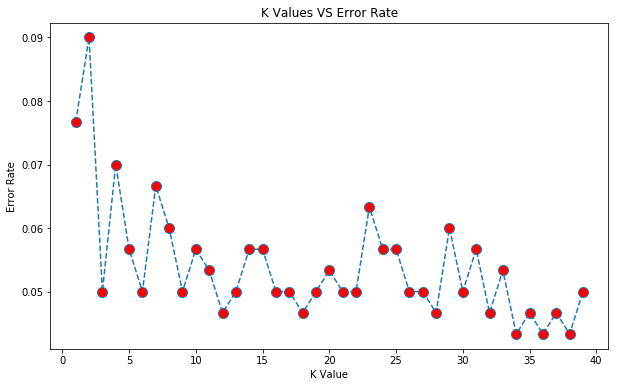

In [50]:
# lets go ahead and plot 'K Values' and 'Error list'

plt.figure(figsize = (10,6))
plt.title('K Values VS Error Rate')
plt.plot(range(1,40), error_list, marker = 'o', markerfacecolor = 'red', linestyle = 'dashed', markersize = 10)
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [51]:
# lets grab a value of n_neighbours off of this plot and see if we can decrease our error rate a bit

knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_test, y_test)
predict = knn.predict(X_test)

print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[150   9]
 [  6 135]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       159
           1       0.94      0.96      0.95       141

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [52]:
# definitely more precision that previous observation by simply finding the accurate n_neighbours values